# **Image Classication using CNN**

Building an image classifier of handwritten digits using Convolutional Neural Network.


https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

In [19]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt
from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Custom Methods**

In [ ]:
def plot_model_loss(model_history):
  plt.plot(model_history['loss'])
  plt.plot(model_history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

def plot_model_accuracy(model_history):
  plt.plot(model_history['accuracy'])
  plt.plot(model_history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legen(['Train', 'Val'], loc='lower right')
  plt.show()

# **Importing and Reshaping DataSet**

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('XTrain shape', x_train.shape)
print('YTrain shape', y_train.shape)
print('XTest shape', x_test.shape)
print('YTest shape', y_test.shape)

XTrain shape (60000, 28, 28)
YTrain shape (60000,)
XTest shape (10000, 28, 28)
YTest shape (10000,)


Image 1 Pic AxesImage(54,36;334.8x217.44)
Image 2 Pic AxesImage(54,36;334.8x217.44)


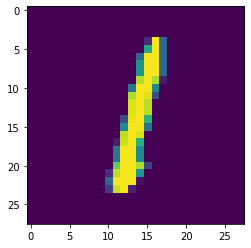

In [15]:
print('Image 1 Pic', plt.imshow(x_train[1]))
print('Image 2 Pic', plt.imshow(x_train[15001]))

Flatten images from 28x28 pixels to 1D 787 pixels.

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

XTrain shape (60000, 784)
YTrain shape (60000,)
XTest shape (10000, 784)
YTest shape (10000,)


One-Not encoding to 10 classes

In [16]:
n_classes = 10
y_train_one_hot = np_utils.to_categorical(y_train, n_classes)
y_test_one_hot = np_utils.to_categorical(y_test, n_classes)
print('y_train_one_hot', y_train_one_hot[1])

y_train_one_hot [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Final shape of training and test data

In [9]:
print('XTrain shape', x_train.shape)
print('YTrain shape', y_train_one_hot.shape)
print('XTest shape', x_test.shape)
print('YTest shape', y_test_one_hot.shape)

XTrain shape (60000, 784)
YTrain shape (60000, 10)
XTest shape (10000, 784)
YTest shape (10000, 10)


# **Create CNN Model**

In [17]:
model = Sequential()

Linear layers with sequential model

In [20]:
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid',
          activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 25)        5650      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 25)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 100)               1

Compile and train the model

In [ ]:
# compile the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
hist = model.fit(x_train, y_train_one_hot, batch_size=128, epochs=10, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
469/469 [==============================] - 126s 266ms/step - loss: 0.6107 - accuracy: 0.9389 - val_loss: 0.0803 - val_accuracy: 0.9753
Epoch 2/10
469/469 [==============================] - 116s 247ms/step - loss: 0.0394 - accuracy: 0.9881 - val_loss: 0.0712 - val_accuracy: 0.9791
Epoch 3/10
469/469 [==============================] - 103s 220ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0771 - val_accuracy: 0.9800
Epoch 4/10
469/469 [==============================] - 99s 212ms/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.0845 - val_accuracy: 0.9803
Epoch 5/10
130/469 [=======>......................] - ETA: 1:08 - loss: 0.0186 - accuracy: 0.9939